# Entrerga

In [1]:
class Polinomios :

  def __init__(self, L):
    self.coeffs = copy(L) #---- PROBLEMAS, argumentos por referencia.
    self.limpia()
    self.len = len(self.coeffs)
    self.grado = self.len - 1

  def limpia(self):
    while self.coeffs and self.coeffs[-1] == 0:
      self.coeffs.pop()

  def __repr__(self):
    return self.coeffs.__repr__()

  def __add__(self,other):
    s = max(self.len,other.len)
    L1 = self.coeffs + [0]*(s-self.len)
    L2 = other.coeffs + [0]*(s-other.len)
    return Polinomios([ L1[i] + L2[i] for i in range(s) ])

  def __add2__(self,other):
    s = min(self.len,other.len)
    C = [self.coeffs[i] + other.coeffs[i] for i in range(s) ]
    if self.len < other.len:
      return Polinomios (C + other.coeffs[s:])
    else:
      return Polinomios (C + self.coeffs[s:])

  def __neg__(self):
    return Polinomios ([- F for F in self.coeffs])

  def __sub__(self,other):
    return self + (-other)

  def __eq__(self,other):
    return self.coeffs == other.coeffs

  def __mul__(self,other):
    if not self.coeffs or not other.coeffs:
      return Polinomios([])
    return Polinomios(do_schoolbook(self,other))

def do_schoolbook(f,g):
  n = len(f)
  m = len(g)
  C = [anillo(0)] * (n+m-1)
  for i in range(n):
    for j in range(m):
        C[i+j] = C[i+j] + f[i]*g[j]
  return C

# No funciona
def do_karatsuba_clase(f,g):
  n0 = len(f)
  n = len(f)
  hago_pop = 0
  if n < 50 :
    return do_schoolbook(f,g)
  if n % 2 == 1:
    f = f+[0]
    g = g+[0]
    n = n+1
    hago_pop=1

  f0 = f[0:n//2]
  f1 = f[n//2:]
  g0 = g[0:n//2]
  g1 = g[n//2:]
  u = do_karatsuba(f0,g0)
  v = do_karatsuba(f1,g1)
  sf = [f0[i]+f1[i] for i in range(n//2)  ]
  sg = [g0[i]+g1[i] for i in range(n//2)  ]
  w = do_karatsuba(sf,sg)
  medio = [ w[i] - u[i] - v[i]  for i in range(len(w))  ]
  C = [0] * (2*n-1)
  for i in range(len(u)):
    C[i] = C[i] + u[i]
    C[n//2+i] = C[n//2+i] + medio[i]
    C[n+i] = C[n+i] + v[i]
  return C[:n0*2-1]

def do_karatsuba(f,g, K_threshold=8):
  n = len(f)
  n0 = n //2
  n1 = n - n0
  if n < K_threshold:
    return do_schoolbook(f,g)
  f0 = f[:n0] # tamaño n0
  f1 = f[n0:]  # tamaño n1
  g0 = g[:n0] # tamaño n0
  g1 = g[n0:]  # tamaño n1
  u = do_karatsuba(f0,g0, K_threshold) # tamaño 2*n0-1
  v = do_karatsuba(f1,g1, K_threshold) # tamaño 2*n1-1
  # Usamos f1, g1 como f0+f1,g0+g1 para evitar crear más listas
  # Fijaos que n1 >= n0
  for i in range(n0):
    f1[i] = f1[i]+f0[i]
    g1[i] = g1[i]+g0[i]
  w = do_karatsuba(f1,g1, K_threshold) # tamaño 2*n1-1
  # resto u y v a w, el problema es que los tamaños pueden ser distintos
  for i in range(2*n0-1):
    w[i] = w[i] - u[i] - v[i]
  for i in range(2*n0-1,2*n1-1):
    w[i] = w[i] - v[i]
  #C = [0] * (2*n-1)
  #for i in range(2*n0-1):
  #  C[i] = C[i] + u[i]
  #  C[n0+i] = C[n0+i] + w[i]
  #  C[2*n0+i] = C[2*n0+i] + v[i]
  #for i in range(2*n0-1,2*n1-1):
  #  C[n0+i] = C[n0+i] + w[i]
  #  C[2*n0+i] = C[2*n0+i] + v[i]
  #
  # u contiene los monomios de 0 a 2*n0-2
  # v contiene los monomios de 2*n0 a 2*n-1
  # solo nos falta el monomio 2*n0-1
  # podemos usarlo para evitar sumas en C
  C = u +[anillo(0)] +v
  for i in range(2*n1-1):
    C[n0+i] = C[n0+i] + w[i]
  return C

def do_karatsuba_different_size(left: list, right: list, K_threshold: int=8) -> list:
    """
    Multiplicación de dos polinomios de diferente grado, usando una
    estrategia de división del polinómio mayor en partes de tamaño
    del polinomio menor. Así, poder aplicar do_karatsuba a las partes.

    INPUT:

    - ``left``  -- representación de polinomio como lista
    - ``right`` -- representación de polinomio como lista
    - ``K_threshold`` -- Entero, se usa como criterio para usar la 
    multiplicación de la escuela si el el grado de alguno de los 
    polinómios es menor que él.

    TESTS:

    sage: do_karatsuba_different_size([anillo(1), anillo(2)], [anillo(3), anillo(4)])  # Grados iguales
    [3, 10, 8]

    sage: do_karatsuba_different_size([anillo(1), anillo(2), anillo(3)], [anillo(4), anillo(5)])  # n > m
    [4, 13, 22, 15]

    sage: do_karatsuba_different_size([anillo(3), anillo(4)], [anillo(1), anillo(2), anillo(3)])  # n < m
    [3, 10, 17, 12]

    sage: do_karatsuba_different_size([], [anillo(1), anillo(2), anillo(3)])  # Caso vacío
    []

    sage: do_karatsuba_different_size([anillo(1)], [anillo(1), anillo(2), anillo(3)])  # Caso n = 1
    [1, 2, 3]

    sage: do_karatsuba_different_size([anillo(1), anillo(2), anillo(3)], [anillo(1)])  # Caso m = 1
    [1, 2, 3]

    sage: do_karatsuba_different_size([anillo(1), anillo(2), anillo(3)], [anillo(4), anillo(5)], K_threshold=1)  # Caso K_threshold bajo
    [4, 13, 22, 15]

    """
    n: int= len(left); m: int= len(right)
    if n == 0 or m == 0:
        return []
    if n == 1:
        c = left[0]
        return [c*a for a in right]
    if m == 1:
        c = right[0]
        return [a*c for a in left] # beware of noncommutative rings
    
    if n <= K_threshold or m <= K_threshold or K_threshold==1 or K_threshold==2:
        return do_schoolbook(left, right)
    if n == m:
        return do_karatsuba(left, right, K_threshold)
    if n > m:
        # left is the bigger list
        # n is the bigger number
        q = n // m
        r = n % m
        output = do_karatsuba(left[:m], right, K_threshold)
        for i in range(1, q): #from 1 <= i < q:
            mi = m*i
            carry = do_karatsuba(left[mi:mi+m], right, K_threshold)
            for j in range(m-1):
                output[mi+j] = output[mi+j] + carry[j]
            output.extend(carry[m-1:])
        if r:
            mi = m*q
            carry = do_karatsuba_different_size(left[mi:], right, K_threshold)
            for j in range (m-1):
                output[mi+j] = output[mi+j] + carry[j]
            output.extend(carry[m-1:])
        return output
    else:
        # n < m, I need to repeat the code due to the case
        # of noncommutative rings.
        q = m // n
        r = m % n
        output = do_karatsuba(left, right[:n], K_threshold)
        for i in range(1,q): #from 1 <= i < q:
            mi = n*i
            carry = do_karatsuba(left, right[mi:mi+n], K_threshold)
            for j in range(n-1):
                output[mi+j] = output[mi+j] + carry[j]
            output.extend(carry[n-1:])
        if r:
            mi = n*q
            carry = do_karatsuba_different_size(left, right[mi:], K_threshold)
            for j in range(n-1):
                output[mi+j] = output[mi+j] + carry[j]
            output.extend(carry[n-1:])
        return output


NUM_SUMA = 0
NUM_PRODUCTO = 0

class anillo:
    def __init__(self, valor):
        self.valor = valor

    def __repr__(self):
        return repr(self.valor)

    def __add__(self, otro):
        global NUM_SUMA 
        NUM_SUMA = NUM_SUMA + 1
        return anillo(self.valor + otro.valor)

    def __sub__(self,otro):
        global NUM_SUMA 
        NUM_SUMA = NUM_SUMA + 1
        return anillo(self.valor - otro.valor)

    def __mul__(self, otro):
        global NUM_PRODUCTO
        NUM_PRODUCTO = NUM_PRODUCTO + 1
        return anillo(self.valor * otro.valor)


# Ejercicio

Crear unas listas donde sus entradas seantuplas de la forma:

(grado, num_sumas, num_multiplicaciones)



Una lista para el schoolbook y otra para karatsuba



tendremos una lsita de cuadramso mas menos para el metodo de la escula


para plotear 

line([(foo[0], foo[1]) for foo in L])

In [2]:
F=GF(11)
R=F['x']
NUM_SUMA = 0
NUM_PRODUCTO = 0
poli_z= R.random_element(105)
poli_d= R.random_element(22)
RESULT= poli_z*poli_d
print(RESULT)


a= [anillo(i) for i in poli_z]
b= [anillo(i) for i in poli_d]
result=do_karatsuba_different_size(a,b)
r1=R([foo.valor for foo in result])
print(r1)



print(r1==RESULT)

print(NUM_SUMA, NUM_PRODUCTO)

4*x^127 + 7*x^126 + 7*x^125 + 9*x^124 + x^123 + 8*x^122 + 7*x^121 + x^120 + 7*x^119 + x^118 + 5*x^117 + 6*x^116 + 8*x^115 + 7*x^114 + 9*x^113 + 5*x^112 + 6*x^111 + 6*x^110 + 10*x^109 + 10*x^108 + 2*x^107 + 4*x^106 + 6*x^105 + 6*x^104 + x^103 + 6*x^102 + x^101 + 5*x^100 + 9*x^99 + x^98 + 6*x^97 + 8*x^96 + 4*x^95 + 9*x^94 + 6*x^93 + 9*x^92 + 2*x^91 + 10*x^90 + 2*x^88 + 2*x^87 + 8*x^86 + 3*x^85 + 5*x^84 + x^83 + 8*x^82 + 4*x^80 + 2*x^79 + 4*x^78 + 7*x^77 + 6*x^76 + 3*x^75 + 5*x^74 + 7*x^73 + 8*x^72 + 10*x^71 + 10*x^70 + 2*x^69 + 3*x^68 + 4*x^67 + x^66 + 8*x^65 + 7*x^64 + 4*x^63 + 6*x^62 + 5*x^61 + 10*x^60 + 6*x^58 + 3*x^57 + 9*x^56 + 6*x^55 + 7*x^54 + 8*x^53 + 5*x^52 + 3*x^51 + 6*x^49 + 9*x^48 + 5*x^47 + 6*x^46 + 9*x^45 + 8*x^44 + 2*x^43 + 9*x^42 + 2*x^41 + 3*x^39 + 3*x^38 + 5*x^37 + 4*x^36 + 10*x^35 + x^34 + 5*x^33 + 7*x^32 + 7*x^29 + 8*x^28 + 6*x^27 + 10*x^26 + 8*x^25 + 3*x^24 + 8*x^23 + 9*x^22 + 4*x^21 + 2*x^20 + 9*x^19 + 2*x^17 + 4*x^16 + 6*x^15 + 2*x^14 + 9*x^13 + 3*x^12 + 3*x^11 + 4

In [7]:
print(list(range(5))[:4])

[0, 1, 2, 3]


In [2]:
R=GF(2)
A=[]
B=[]

g=[anillo(R(1))]*1024
for i in range(10**2+1):
    f = [anillo(R(1)) for t in range(i)]
    # print(f)
    NUM_SUMA = 0
    NUM_PRODUCTO = 0
    h=do_schoolbook(f,g)
    A.append((i,NUM_SUMA,NUM_SUMA+NUM_PRODUCTO))

    NUM_SUMA = 0
    NUM_PRODUCTO = 0
    h=do_karatsuba_different_size(f,g, K_threshold=8)
    B.append((i,NUM_SUMA,NUM_SUMA+NUM_PRODUCTO))
    if i%50 == 0:
        print(i)




0
50
100


In [3]:
print(B)
print(A)

#line([[(0,0), (1,1)],[(1,0), (1,1)]])

[(0, 0, 0), (1, 0, 1024), (2, 2048, 4096), (3, 3072, 6144), (4, 4096, 8192), (5, 5120, 10240), (6, 6144, 12288), (7, 7168, 14336), (8, 8192, 16384), (9, 12154, 19675), (10, 12382, 20072), (11, 13764, 22796), (12, 13988, 23216), (13, 15361, 25918), (14, 15577, 26336), (15, 18692, 28612), (16, 19633, 28849), (17, 21428, 32296), (18, 21787, 33051), (19, 22332, 33994), (20, 22112, 33667), (21, 23859, 36995), (22, 24225, 37814), (23, 24732, 38720), (24, 24585, 38465), (25, 26175, 41563), (26, 26627, 42515), (27, 27108, 43370), (28, 27015, 43191), (29, 30474, 45985), (30, 31604, 46514), (31, 32835, 47155), (32, 32993, 46817), (33, 35123, 50780), (34, 35716, 52052), (35, 36440, 53414), (36, 36350, 53334), (37, 37121, 54735), (38, 37070, 54584), (39, 37208, 54824), (40, 36885, 54356), (41, 38683, 57710), (42, 39507, 59298), (43, 40117, 60546), (44, 39987, 60486), (45, 40922, 61938), (46, 40783, 61860), (47, 41000, 62106), (48, 40638, 61482), (49, 42433, 65046), (50, 43078, 66334), (51, 43544, 

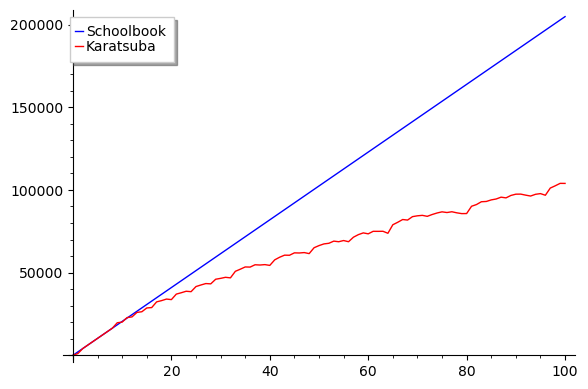

In [4]:
# print([(foo[0], foo[1]) for foo in A])
# print([(foo[0], foo[1]) for foo in B])
line([(foo[0], foo[2]) for foo in A], color='blue', legend_label='Schoolbook') + line([(foo[0], foo[2]) for foo in B], color='red', legend_label='Karatsuba')



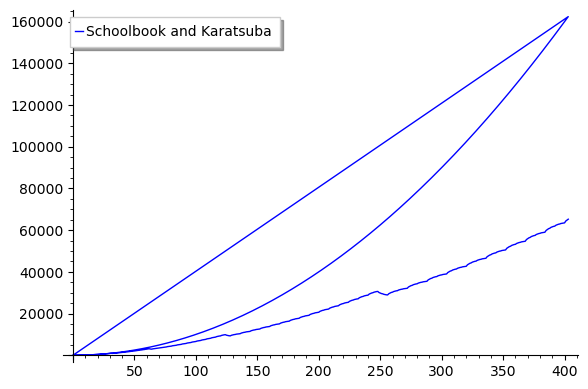

In [ ]:
line([(foo[0], foo[1]) for foo in A] + [(foo[0], foo[1]) for foo in B], legend_label='Schoolbook and Karatsuba')

In [ ]:
x=0 if 1>0 else 1

In [ ]:
x

0

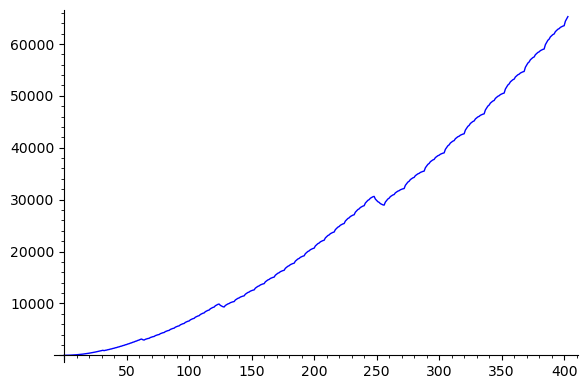

In [ ]:
line([(foo[0], foo[1]) for foo in B])

In [ ]:
#Queremos que los elementos sean instancias de anillo, no de R
R=QQ['x']
n = 11
lista=[1]
l1= [anillo(lista*i) for i in range(1,n)]
l2= [anillo(lista*i) for i in range(1,n)]


lf = [do_schoolbook(fo, foo) for fo, foo in zip(l1,l2)]


print(lf)




TypeError: object of type 'anillo' has no len()

# Cositas


In [ ]:
import matplotlib.pyplot as plt

def O_schoolbook_ops(n):
    return n**2  # O(n^2)

def O_karatsuba_ops(n):
    return n**(log(3)/log(2))  # O(n^log2(3))

sizes = range(len(valores_karatsuba))
O_n2 = [1*O_schoolbook_ops(i) for i in sizes]
O_nlog23 = [15*O_karatsuba_ops(i) for i in sizes]

plt.figure(figsize=(10, 6))
plt.plot(sizes, O_n2, label="O(n^2)", linewidth=2)
plt.plot(sizes, [i[2] for i in valores_schoolbook], label="Schoolbook", linewidth=2)
plt.plot(sizes, O_nlog23, label="O(n^log2(3))", linewidth=2)
plt.plot(sizes, [i[2] for i in valores_karatsuba], label="Karatsuba", linewidth=2)
plt.xlabel("Tamaño del polinomio (n)")
plt.ylabel("Número de operaciones")
plt.title("Comparación de complejidad: Schoolbook vs Karatsuba")
plt.legend()
plt.grid()
plt.show()




# Xtras

In [11]:
def generador_listas(tamaño_max=100, card_cuerpo_finito=2, K_threshold=2, verbose=False):
    F=GF(card_cuerpo_finito)
    R=F['x']
    L_K=[]
    L_S=[]
    global NUM_SUMA, NUM_PRODUCTO    
    for i in range(tamaño_max+1):
        f = [anillo(R(1)) for t in range(i)]
        
        NUM_SUMA = 0
        NUM_PRODUCTO = 0
        k_result=do_karatsuba(f, f, K_threshold=K_threshold)
        L_K.append((i, NUM_PRODUCTO, NUM_SUMA+NUM_PRODUCTO))

        NUM_SUMA = 0
        NUM_PRODUCTO = 0
        s_result=do_schoolbook(f, f)
        L_S.append((i, NUM_PRODUCTO, NUM_SUMA+NUM_PRODUCTO))
        
        
        if verbose and i%50==0:
            print(i)        
    
    return L_K, L_S

In [12]:
import numpy as np
import plotly.graph_objects as go

def crear_frames_threshold(tam_poli, threshold_range, verbose=False):
    """Crea los frames para graficar listas con el deslizador de umbral."""
    frames = []
    totavalores_schoolbookteps = len(threshold_range)
    if verbose:
        print(f"Creando frames para {totavalores_schoolbookteps} valores de threshold...")

    for i, threshold in enumerate(threshold_range,2):
        if verbose and i % 10 == 0:  # Mostrar progreso cada 10 iteraciones
            print(f"Progreso: {i}/{totavalores_schoolbookteps} frames creados...")
        
        # Filtrar datos por el threshold
        y_k, y_s = generador_listas(tamaño_max=tam_poli, K_threshold=threshold)
        x_k = tam_poli
        x_s = tam_poli
        
        frames.append(go.Frame(data=[
            go.Scatter(x=list(x_k), y=y_k, mode='lines', name=f"Karatsuba"),
            go.Scatter(x=list(x_s), y=y_s, mode='lines', name=f"Schoolbook")
        ], name=str(threshold)))
    
    if verbose:
        print("Frames creados completamente.")
    return frames

def configurar_figura_threshold(valores_karatsuba, valores_schoolbook, threshold_range, frames):
    """Configura la figura inicial para graficar listas con threshold."""
    fig = go.Figure(
        data=[
            go.Scatter(x=list(range(len(valores_karatsuba))), y=valores_karatsuba, mode='lines', name="valores_karatsuba (sin filtro)"),
            go.Scatter(x=list(range(len(valores_schoolbook))), y=valores_schoolbook, mode='lines', name="valores_schoolbook (sin filtro)")
        ],
        layout=go.Layout(
            title="Gráfica de listas valores_karatsuba y valores_schoolbook con filtro de umbral",
            xaxis=dict(title="Índice"),
            yaxis=dict(title="Valores"),
        ),
        frames=frames
    )
    return fig

def agregar_deslizador_threshold(fig, threshold_range):
    """Agrega un deslizador para controlar el umbral."""
    sliders = [dict(
        steps=[dict(method="animate",
                    args=[[str(threshold)], dict(mode="immediate",
                                                 frame=dict(duration=100, redraw=True),
                                                 transition=dict(duration=0))],
                    label=f"{threshold:.1f}") for threshold in threshold_range],
        transition=dict(duration=0),
        x=0.1,
        y=-0.2,
        currentvalue=dict(font=dict(size=15), prefix="Umbral: ", visible=True, xanchor="center"),
        len=0.9
    )]
    fig.update_layout(sliders=sliders)

def graficar_listas_umbral(tam_poli=60, max_threshold_range=60, verbose=False):
    """Grafica las listas valores_karatsuba y valores_schoolbook con un deslizador para el umbral."""
    if verbose:
        print("Iniciando generación de la visualización...")
    if verbose:
        print(f"Tamaño de las listas: valores_karatsuba={len(valores_karatsuba)}, valores_schoolbook={len(valores_schoolbook)}")
        print("Generando frames...")
    
    # Crear frames
    threshold_range=np.linspace(2, max_threshold_range, max_threshold_range+1)
    frames = crear_frames_threshold(tam_poli, threshold_range, verbose=verbose)

    if verbose:
        print("Configurando figura...")
    fig = configurar_figura_threshold(valores_karatsuba, valores_schoolbook, threshold_range, frames)

    if verbose:
        print("Agregando deslizador...")
    agregar_deslizador_threshold(fig, threshold_range)

    if verbose:
        print("Mostrando figura interactiva...")
    fig.show()


In [13]:
graficar_listas_umbral(tam_poli=90, 
                        max_threshold_range=40, 
                        verbose=False)

NameError: name 'do_karatsuba' is not defined

In [ ]:
def generador_listas(tamaño_max=100, card_cuerpo_finito=2, K_threshold=8, verbose=False):
    F=GF(card_cuerpo_finito)
    R=F['x']
    L_K=[]
    L_S=[]
    g = [anillo(R(1))]*1024
    global NUM_SUMA, NUM_PRODUCTO    
    for i in range(tamaño_max+1):
        f = [anillo(R(1)) for t in range(i)]
        NUM_SUMA = 0
        NUM_PRODUCTO = 0
        k_result=do_karatsuba_different_size(f, g, K_threshold=K_threshold)
        L_K.append((i, NUM_PRODUCTO, NUM_SUMA+NUM_PRODUCTO))

        NUM_SUMA = 0
        NUM_PRODUCTO = 0
        s_result=do_schoolbook(f, g)
        L_S.append((i, NUM_PRODUCTO, NUM_SUMA+NUM_PRODUCTO))
        
        
        if verbose and i%50==0:
            print(i)        
    
    return L_K, L_S

l_k, l_s = generador_listas(tamaño_max=100, 
                            card_cuerpo_finito=2,
                            K_threshold=8,
                            verbose=True)

print(l_k)
print(l_s)